Pick any dataset for binary classification and divide the dataset into a training and a validation set. Learn a Logistic Regression classifier on the training set.

The LR classifier returns a posterior probability for each sample. Use this score to plot the ROC curve for the validation set and compute the Area under the Curve (AUC).

Discuss how you would set the threshold to obtain a desired outcome, e.g. to have the rate of false alarms below 10%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
#Source https://www.kaggle.com/ronitf/heart-disease-uci
heart_DF = pd.read_csv("heart-disease-uci/heart.csv", sep = ",")

In [3]:
heart_DF.head()
#According to discussions target 0 means significant heart disease and 1 means there is not

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Setting up Features and labels
Heart_Features = heart_DF.loc[:, heart_DF.columns !='target'].copy()
Heart_label = heart_DF[['target']]

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = Heart_Features
y = Heart_label

#Normalizing the data

from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

#Creating Training, validation and test set
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=10)
# .7 Training / .1 val / .2 Test
# .8 of the original train * .125 will equal .1  Subtract .8 with .1 because .1 is the validation set and .7 is the train
#leaving the remaining .2 as the test set

In [61]:
#Fitting the model
LogReg = LogisticRegression(solver='lbfgs', multi_class = 'auto')
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
#Extra info about our LogRegression
print(LogReg.coef_)
print(LogReg.intercept_)

[[-0.67069202 -0.050516    0.13516358 -0.85923996 -0.74963177 -0.00653026
   0.01550932  2.24890908 -0.0586481  -0.15642864  0.06078681 -0.14144954
  -0.06509182]]
[0.24200605]


In [63]:
#Predicting using the model
y_pred = LogReg.predict(X_val)

In [64]:
#extra information about the LogReg
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.6774193548387096
              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.69      0.90      0.78        20

   micro avg       0.68      0.68      0.68        31
   macro avg       0.65      0.59      0.58        31
weighted avg       0.66      0.68      0.64        31



In [65]:
#Seeing the T/F P/N 
confusion_matrix(y_val, y_pred)

array([[ 3,  8],
       [ 2, 18]], dtype=int64)

In [68]:
print('True Positive: 3')
print('True Negative: 8')
print('False Positive: 2')
print('False Negative: 18')

True Positive: 3
True Negative: 8
False Positive: 2
False Negative: 18


False positive rate  = False positive / (False positive + True Negative)
 2 / (2+8) = 2/10  = 1/5

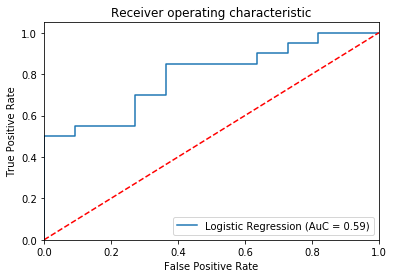

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, LogReg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, LogReg.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AuC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#Area under the curve is .59

Discuss how you would set the threshold to obtain a desired outcome, e.g. to have the rate of false
alarms below 10%.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=10)
#56% training and 24% validation set

In [76]:
LogReg = LogisticRegression(solver='lbfgs', multi_class = 'auto')
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
#Predicting using the model
y_pred = LogReg.predict(X_val)

In [78]:
confusion_matrix(y_val, y_pred)

array([[ 4, 28],
       [ 0, 41]], dtype=int64)

In [ ]:
print('True Positive: 4')
print('True Negative: 28')
print('False Positive: 0')
print('False Negative: 41')

False positive rate = False positive / (False positive + True Negative) 0 / (0+28) = 0/28 = 0
According to this, if we use a test set of 56%, validation set of 24% and test set of 20% then the false positive rate will be 0 



Let’s revisit the diamonds dataset we looked at in Assignment 1 and explore regression analysis to predict the price of diamonds.
1. Start by plotting the scatter plot of price vs carat, as you had done in Assignment 1. What can you say about the relationship from the plot ? (2 points)


In [13]:
Diamonds_DF = pd.read_csv(("./diamonds/diamonds.csv"), sep = ",") 
Diamonds_DF.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


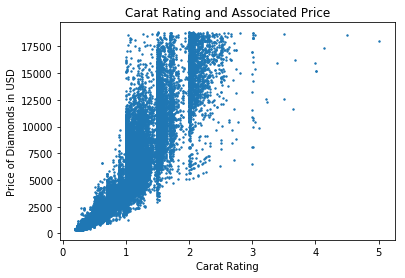

In [14]:
D_X= Diamonds_DF['carat']
D_y = Diamonds_DF['price']
plt.scatter(D_X,D_y, s=2)
plt.xlabel("Carat Rating")
plt.ylabel("Price of Diamonds in USD")
plt.title("Carat Rating and Associated Price")
plt.show()

Based on this scatterplot we can assume that the data between carat rating and the price of the diamond is positivly correlated.  There appear to be a few outliers as well.  

Divide the dataset randomly in a 70:30 ratio into a training set and a test set

In [15]:
Di_X = Diamonds_DF['carat']
Di_y = Diamonds_DF['price']


DX_train, DX_test, Dy_train, Dy_test = train_test_split(Di_X, Di_y, test_size=0.3, random_state=15)


In [16]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
DX_train1 = DX_train.values.reshape(-1,1)
LinReg.fit(DX_train1, Dy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
DX_test1 = DX_test.values.reshape(-1,1)
DY_Pred = LinReg.predict(DX_test1)

In [18]:
LinReg.score(DX_test1, Dy_test)
#R^2

0.8483435417969641

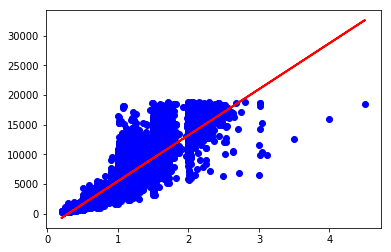

In [19]:
plt.scatter(DX_test, Dy_test,  color='blue')
plt.plot(DX_test, DY_Pred, color='red', linewidth=2)

plt.show()

In [20]:
print("Coefficient of Determination:", metrics.r2_score(Dy_test, DY_Pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Dy_test, DY_Pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Dy_test, DY_Pred))  
#Standard error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Dy_test, DY_Pred)))

Coefficient of Determination: 0.8483435417969641
Mean Absolute Error: 1010.3478432651609
Mean Squared Error: 2422083.7065614387
Root Mean Squared Error: 1556.304503161717


Experiment with adding other explanatory variables to the model which you think might explain the variance in price on the training set, and observe the impact on the Coefficient of Determination. (5 points)

In [21]:
#Selecting only categorical data in the DF
Into_Int = Diamonds_DF.select_dtypes(include=[object])
Into_Int.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [22]:
from sklearn import preprocessing

In [23]:
#Checking the colums available 
Into_Int.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [24]:
#Encode labels with value between 0 and n_classes-1
le = preprocessing.LabelEncoder()

#Fit and transform
#using df.apply() to apply le.fit_transofrm to all columns
Into_Int_2 = Into_Int.apply(le.fit_transform)
Into_Int_2.head()

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3


In [25]:
#Combine the new DF with the previous ones that were already integers
Dexp_X1 = Diamonds_DF[['carat','x','y','z','table','depth']]
frames = [Dexp_X1, Into_Int_2]
Master_DF = pd.concat(frames, axis=1, sort='False')
Master_DF.head()

,carat,x,y,z,table,depth,cut,color,clarity
0,0.23,3.95,3.98,2.43,55.0,61.5,2,1,3
1,0.21,3.89,3.84,2.31,61.0,59.8,3,1,2
2,0.23,4.05,4.07,2.31,65.0,56.9,1,1,4
3,0.29,4.20,4.23,2.63,58.0,62.4,3,5,5
4,0.31,4.34,4.35,2.75,58.0,63.3,1,6,3


In [26]:
#Prepping the DF to make ready for Test/Train
Dexp_X = Master_DF
Dexp_y = Diamonds_DF[['price']]

In [27]:
#Creating the Test and Training set 70 Test 30 Train
Dexp_X_train, Dexp_X_test, Dexp_y_train, Dexp_y_test = train_test_split(Dexp_X, Dexp_y, test_size=0.3, random_state=15)

In [28]:
#Fitting the linear regression
LinRegExp = LinearRegression()

LinRegExp.fit(Dexp_X_train, Dexp_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
#Predicting the costs based on the Linear Regression
Dexp_Y_Pred = LinRegExp.predict(Dexp_X_test)

In [30]:
#Details about the Linear Regression
#R^2
print("Coefficient of Determination:", metrics.r2_score(Dexp_y_test, Dexp_Y_Pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Dexp_y_test, Dexp_Y_Pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Dexp_y_test, Dexp_Y_Pred))  
#Standard error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Dexp_y_test, Dexp_Y_Pred)))

Coefficient of Determination: 0.8828198797113065
Mean Absolute Error: 866.6518007570094
Mean Squared Error: 1871467.0212341307
Root Mean Squared Error: 1368.0157240449141


After experimenting I found these results:
Adding any extra variables to price always ended up reducing the Coefficient of determination.  Meanwhile the more variables that were added to carat increased Coefficient of determination.  There was improvement when carat had x,y,z, table and depth but and even greater improvement when cut, color and clarity were added (after they were transformed from categorical subjects).


Would a variable transformation on either the response variable (price) or carat, or both, help improve regression over the linear model developed in part 4 ? (5 points)

In [31]:
#Changing Carat variable by log transformation

In [32]:
to_log = Master_DF[['carat']]
Df_log = to_log.applymap(lambda x:np.log(x+1))
Df_log.head()

,carat
0,0.207014
1,0.190620
2,0.207014
3,0.254642
4,0.270027


In [33]:
#Prepping the DF's to become one after finding the log for only carat
Dexp_X2 = Diamonds_DF[['x','y','z','table','depth']]
frames2 = [Dexp_X2, Into_Int_2,Df_log]

In [34]:
Master_DF_log = pd.concat(frames2, axis=1, sort='False').copy()
Master_DF_log.head()

,x,y,z,table,depth,cut,color,clarity,carat
0,3.95,3.98,2.43,55.0,61.5,2,1,3,0.207014
1,3.89,3.84,2.31,61.0,59.8,3,1,2,0.190620
2,4.05,4.07,2.31,65.0,56.9,1,1,4,0.207014
3,4.20,4.23,2.63,58.0,62.4,3,5,5,0.254642
4,4.34,4.35,2.75,58.0,63.3,1,6,3,0.270027


In [35]:
#Prepping DF for Test/Train 
#Set split as 70 Test 30 Train
Dexp_X2 = Master_DF_log
Dexp_y2 = Diamonds_DF[['price']]
Dexp_X_train2, Dexp_X_test2, Dexp_y_train2, Dexp_y_test2 = train_test_split(Dexp_X2, Dexp_y2, test_size=0.3, random_state=15)

In [36]:
#Fitting the Linear regression model
LinRegExp2 = LinearRegression()

LinRegExp2.fit(Dexp_X_train2, Dexp_y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#Predicting cost
Dexp_Y_Pred2 = LinRegExp.predict(Dexp_X_test2)

In [38]:
#Details about the Linear Regression model
print("Coefficient of Determination:", metrics.r2_score(Dexp_y_test2, Dexp_Y_Pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Dexp_y_test2, Dexp_Y_Pred2)) 
print('Mean Squared Error:', metrics.mean_squared_error(Dexp_y_test2, Dexp_Y_Pred2))  
#Standard error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Dexp_y_test2, Dexp_Y_Pred2)))

Coefficient of Determination: -232.13129280634266
Mean Absolute Error: 60501.89807501867
Mean Squared Error: 3723306692.5503554
Root Mean Squared Error: 61018.90438667639


In [39]:
#Log transformation on price

In [40]:
#Transforming price using log 
to_log3 = Diamonds_DF[['price']]
Df_log3 = to_log3.applymap(lambda x:np.log(x+1))
Df_log3.head()

,price
0,5.789960
1,5.789960
2,5.793014
3,5.814131
4,5.817111


In [41]:
#Creating the Test/Training sets 70 train 30 Test (Only price is has been logged)
Dexp_X3 = Master_DF
Dexp_y3 = Df_log3
Dexp_X_train3, Dexp_X_test3, Dexp_y_train3, Dexp_y_test3 = train_test_split(Dexp_X3, Dexp_y3, test_size=0.3, random_state=15)

In [51]:
#Fitting the Linear Regression model
LinRegExp3 = LinearRegression()
LinRegExp3.fit(Dexp_X_train3, Dexp_y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#Predicting using logged price values only
Dexp_Y_Pred3 = LinRegExp.predict(Dexp_X_test3)

In [44]:
#Details about the Linear Regression
print("Coefficient of Determination:", metrics.r2_score(Dexp_y_test3, Dexp_Y_Pred3))
print('Mean Absolute Error:', metrics.mean_absolute_error(Dexp_y_test3, Dexp_Y_Pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(Dexp_y_test3, Dexp_Y_Pred3))  
#Standard error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Dexp_y_test3, Dexp_Y_Pred3)))

Coefficient of Determination: -28827883.946645193
Mean Absolute Error: 4016.120502077205
Mean Squared Error: 29790800.884111755
Root Mean Squared Error: 5458.094986724925


In [45]:
#Both variables transformed by log

In [46]:
Logged_X = Master_DF_log
Logged_y = Df_log3

In [47]:
#Creating the test/training set 70 train 30 test
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(Logged_X, Logged_y, test_size=0.3, random_state=15)

In [48]:
#Fitting the model
Log_LinReg = LinearRegression()

Log_LinReg.fit(log_X_train, log_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
#Predicting using model
log_Y_Pred = Log_LinReg.predict(log_X_test)

In [50]:
#Details about the Linear Regression
print("Coefficient of Determination:", metrics.r2_score(log_y_test, log_Y_Pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(log_y_test, log_Y_Pred))  
print('Mean Squared Error:', metrics.mean_squared_error(log_y_test, log_Y_Pred))  
#Standard error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_y_test, log_Y_Pred)))

Coefficient of Determination: 0.9415758344863454
Mean Absolute Error: 0.17739421035136133
Mean Squared Error: 0.06037566352366833
Root Mean Squared Error: 0.24571459770161871


The variable transformation I used was a log transformation because according to Online Statistics Education: An Interactive Multimedia Course of Study, "The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics."  When only one or the other (carat or price) was logged, the R^2 value was way off.  While both were in the logged format the R^2 value went up quite a bit and made a big change for the better.  

For each sample in the test set, predict the price using the best models from parts 4 and 5 and compute the standard error of the models on the test set. (5 points)

Best set from #4
Coefficient of Determination: 0.8828198797113065
Mean Absolute Error: 866.6518007570094
Mean Squared Error: 1871467.0212341307
(Standard error) Root Mean Squared Error: 1368.0157240449141


Best set from #5
Coefficient of Determination: 0.9415758344863454
Mean Absolute Error: 0.17739421035136133  (Unlogged 10^.177 = 1.5)
Mean Squared Error: 0.06037566352366833   (Unlogged 10^.06 = 1.15)
(Standard error)Root Mean Squared Error: 0.24571459770161871  (Unlogged 10^.25 = 1.78)

Sources:
Problem 2
How to make RoC -
    https://towardsdatascience.com/logistic-regression-python-7c451928efee
    https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
    
Problem 3
Linear regression -
https://www.kaggle.com/fuzzywizard/diamonds-in-depth-analysis
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/
Transforming Categorical data - https://www.ritchieng.com/machinelearning-one-hot-encoding/ 
Why log-
http://onlinestatbook.com/2/transformations/log.html
https://stackoverflow.com/questions/36901302/log-transformation-and-index-changing-in-python